# Klasifikasi Jenis Kaca Berdasarkan Komposisi Kimia

- RI : Indeks Bias (Refractive Index). Merupakan ukuran seberapa banyak cahaya dibelokkan saat melewati kaca. Nilai ini sangat sensitif terhadap komposisi kimia.
- Na : Kandungan Natrium (Sodium).
- Mg : Kandungan Magnesium.
- Al : Kandungan Aluminium.
- Si : Kandungan Silikon (Silica).
- K  : Kandungan Kalium (Potassium).
- Ca : Kandungan Kalsium.	% berat
- Ba : Kandungan Barium.
- Fe : Kandungan Besi (Iron). 
- Type : Jenis Kaca (Kolom Target). Menunjukkan kategori jenis kaca sampel.


## A. Preparation

### A.1 Import Library

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set(style='darkgrid', font_scale=1.1)

### A.2 Load Dataset

In [56]:
try:
 df = pd.read_csv("glass.csv")
 print("berhasil memuat data")
except Exception as e:
 print(f"Gagal Memuat Data as {e}")

berhasil memuat data


### A.3 Cek dimensi data

In [57]:
df.shape

(214, 10)

### A.4 Cek 5 data teratas

In [58]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### A.5 Cek Info data

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### A.6 Cek duplikasi data

In [60]:
df.duplicated().sum()

np.int64(1)

### A.7 Cek nilai kosong

In [61]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### A.8 Cek Statistik Data

In [62]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
RI,214.00,1.52,0.00,1.51,1.52,1.52,1.52,1.53
Na,214.00,13.41,0.82,10.73,12.91,13.30,13.82,17.38
Mg,214.00,2.68,1.44,0.00,2.11,3.48,3.60,4.49
Al,214.00,1.44,0.50,0.29,1.19,1.36,1.63,3.50
Si,214.00,72.65,0.77,69.81,72.28,72.79,73.09,75.41
K,214.00,0.50,0.65,0.00,0.12,0.56,0.61,6.21
Ca,214.00,8.96,1.42,5.43,8.24,8.60,9.17,16.19
Ba,214.00,0.18,0.50,0.00,0.00,0.00,0.00,3.15
Fe,214.00,0.06,0.10,0.00,0.00,0.00,0.10,0.51
Type,214.00,2.78,2.10,1.00,1.00,2.00,3.00,7.00


### A.9 Cek data outlier

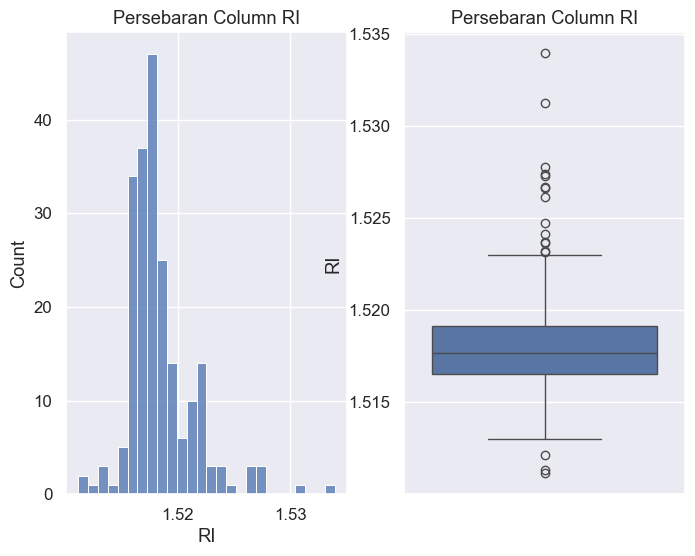

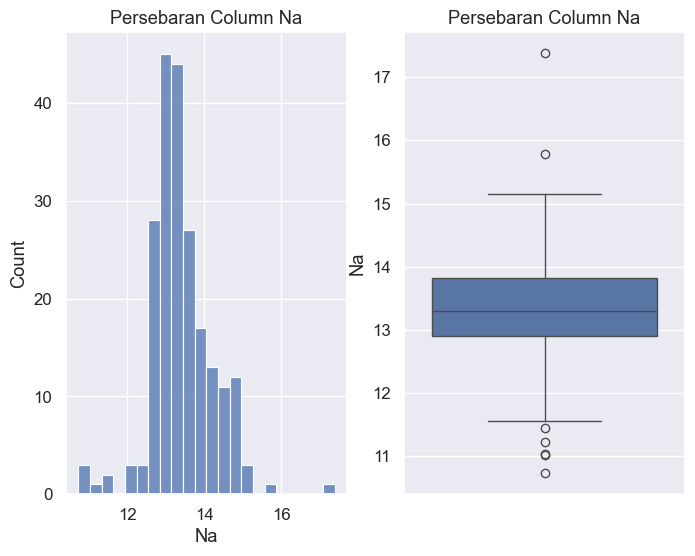

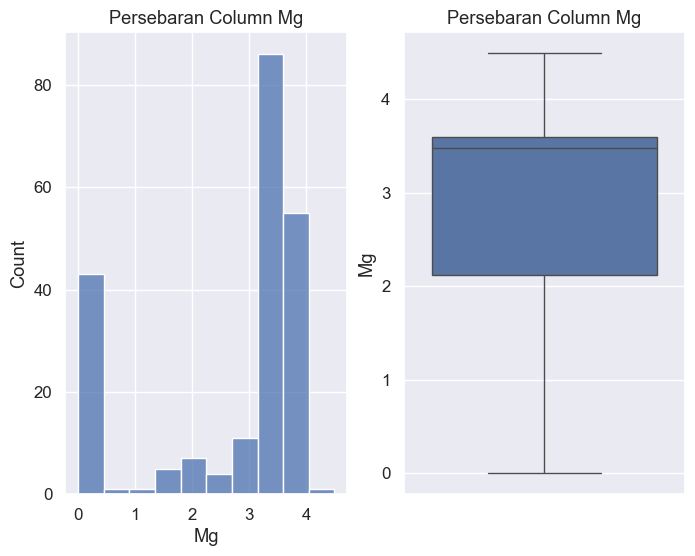

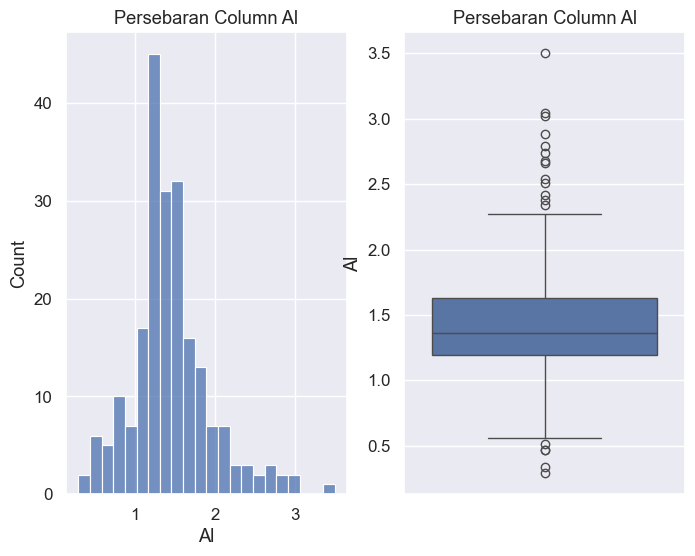

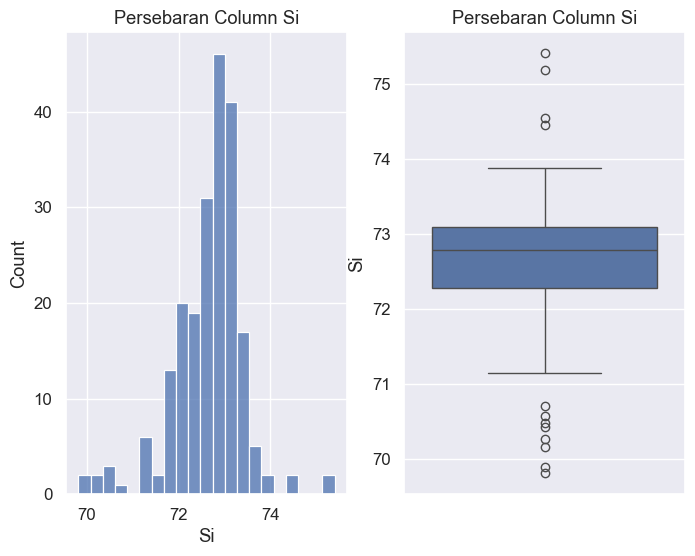

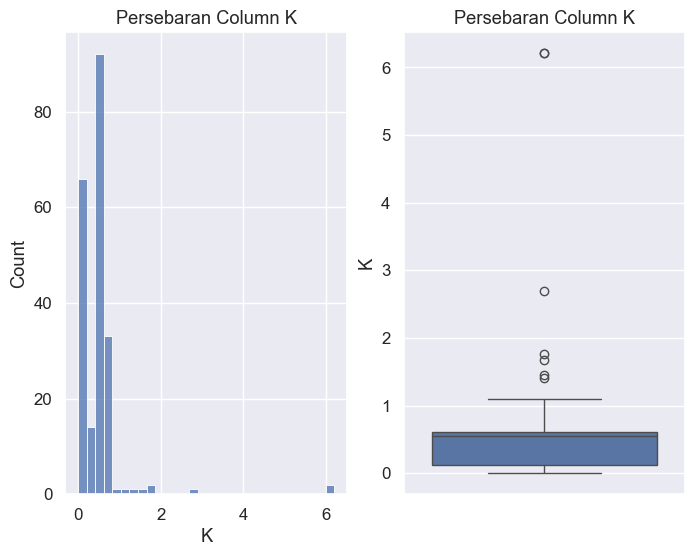

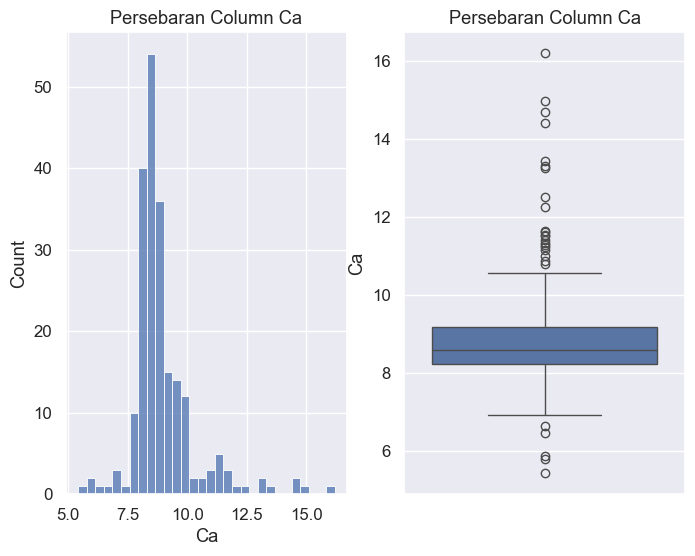

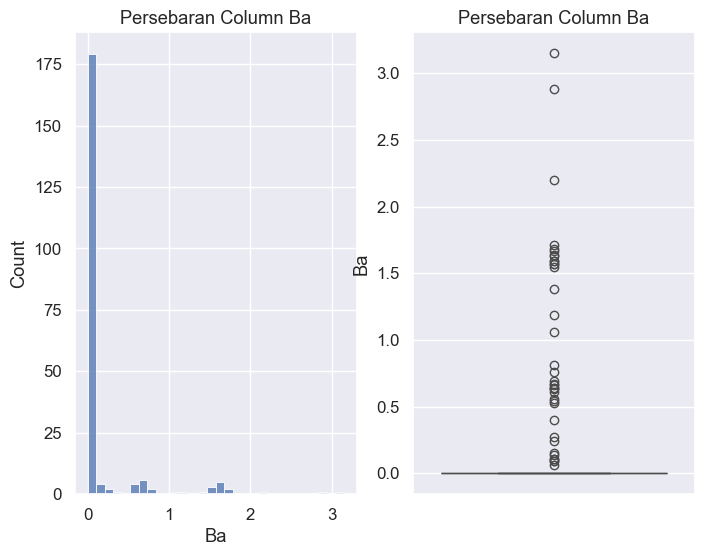

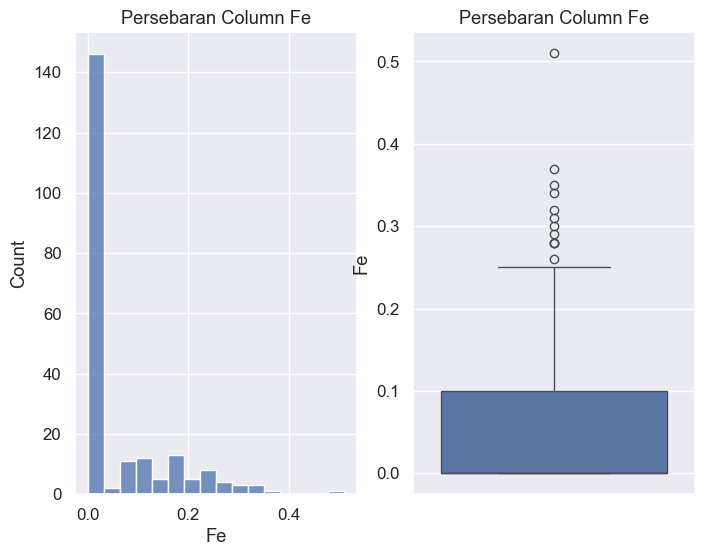

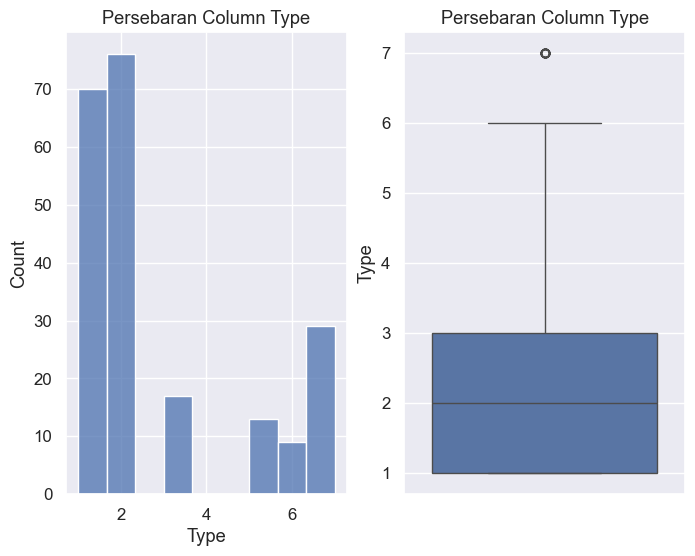

In [63]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(8,6))
    sns.histplot(df[col], ax=axes[0])
    axes[0].set_title(f"Persebaran Column {col}")
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"Persebaran Column {col}")
    
    plt.show()

## B. Preprocess

### B.1 Hapus Data Duplikat

In [64]:
df_clean = df.copy()

In [65]:
df_clean = df.drop_duplicates()

In [66]:
num_clean = df_clean.select_dtypes(include='number')

### B.2 Cek dan handling outlier

In [67]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [68]:
df_clean['RI'] = df_clean['RI'].clip(1.510, 1.525)

C:\Users\nahls\AppData\Local\Temp\ipykernel_2880\1155563540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['RI'] = df_clean['RI'].clip(1.510, 1.525)


In [69]:
df_clean['Na'] = df_clean['Na'].clip(11, 15.2)

C:\Users\nahls\AppData\Local\Temp\ipykernel_2880\2624124999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Na'] = df_clean['Na'].clip(11, 15.2)


In [70]:
df_clean['Al'] = df_clean['Al'].clip(3.1, 0.2)

C:\Users\nahls\AppData\Local\Temp\ipykernel_2880\455483690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Al'] = df_clean['Al'].clip(3.1, 0.2)


In [71]:
df_clean['Si'] = df_clean['Si'].clip(68, 74.5)

C:\Users\nahls\AppData\Local\Temp\ipykernel_2880\441342217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Si'] = df_clean['Si'].clip(68, 74.5)


In [72]:
df_clean['K'] = df_clean['K'].clip(0, 1.9)

C:\Users\nahls\AppData\Local\Temp\ipykernel_2880\2415093151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['K'] = df_clean['K'].clip(0, 1.9)


In [73]:
df_clean['Ca'] = df_clean['Ca'].clip(5.5, 11.8)

C:\Users\nahls\AppData\Local\Temp\ipykernel_2880\3518535849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Ca'] = df_clean['Ca'].clip(5.5, 11.8)


In [74]:
df_clean['Fe'] = df_clean['Fe'].clip(0.0, 0.3)

C:\Users\nahls\AppData\Local\Temp\ipykernel_2880\377417387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Fe'] = df_clean['Fe'].clip(0.0, 0.3)


In [75]:
df_clean['Ba'] = df_clean['Ba'].clip(0.0, 1.0)

C:\Users\nahls\AppData\Local\Temp\ipykernel_2880\4054872894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Ba'] = df_clean['Ba'].clip(0.0, 1.0)


In [76]:
df_clean['Type'] = df_clean['Type'].clip(0.00, 6)

C:\Users\nahls\AppData\Local\Temp\ipykernel_2880\2163198900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Type'] = df_clean['Type'].clip(0.00, 6)


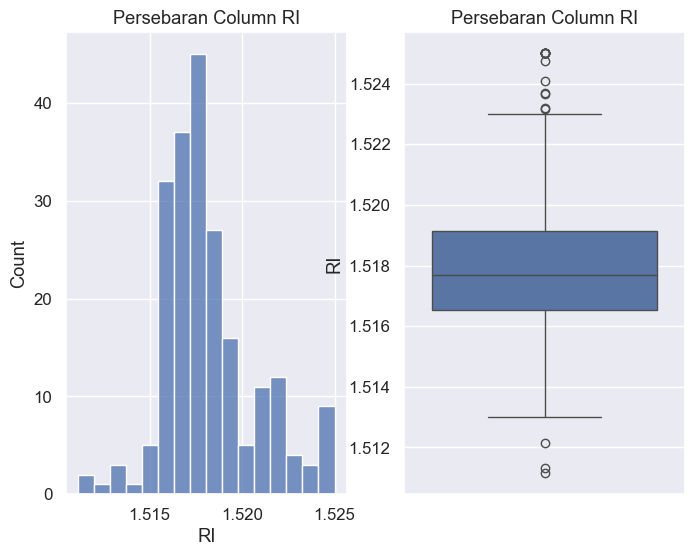

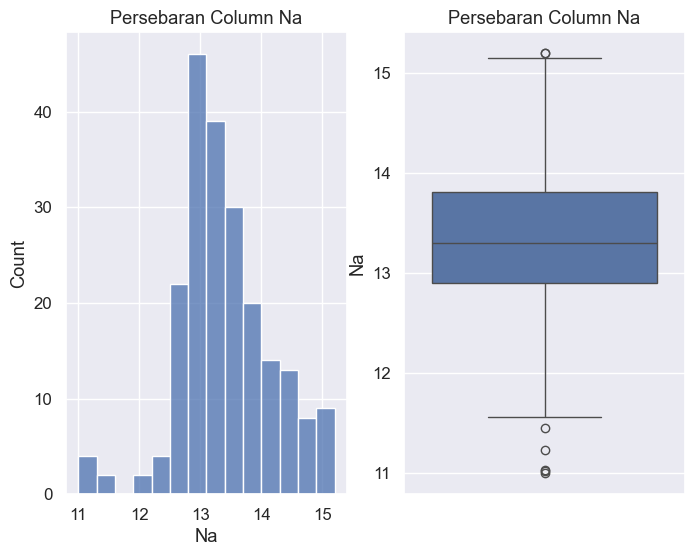

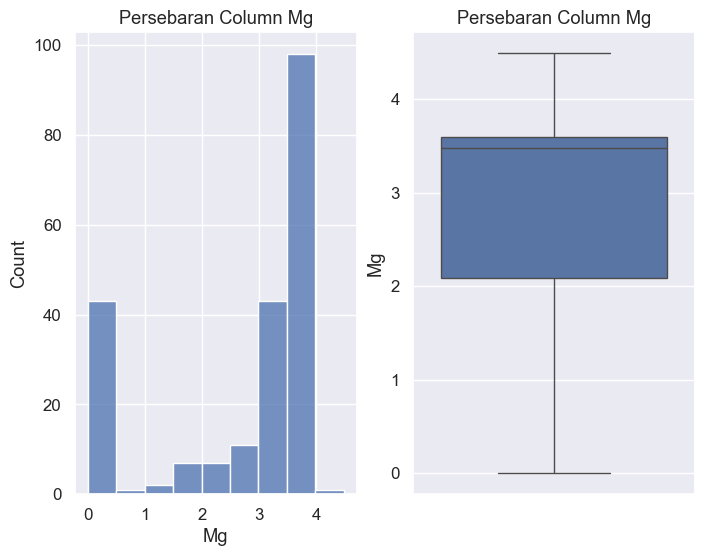

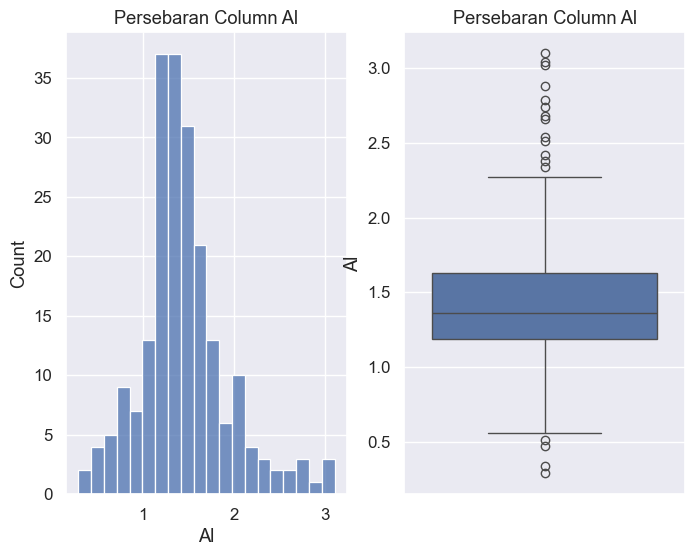

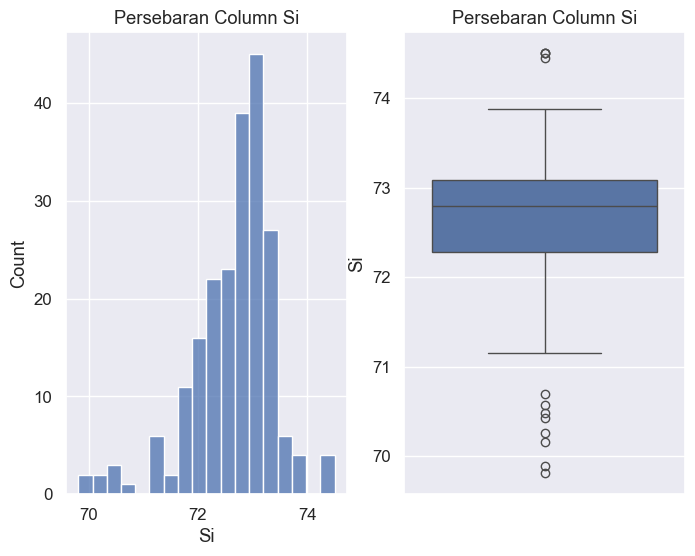

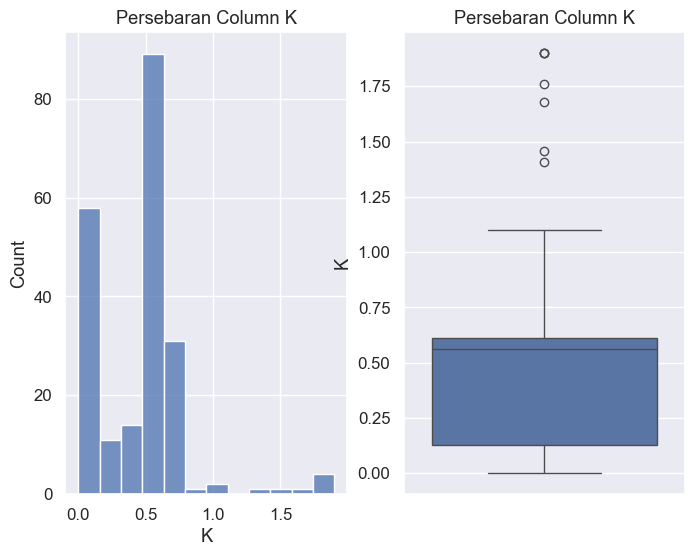

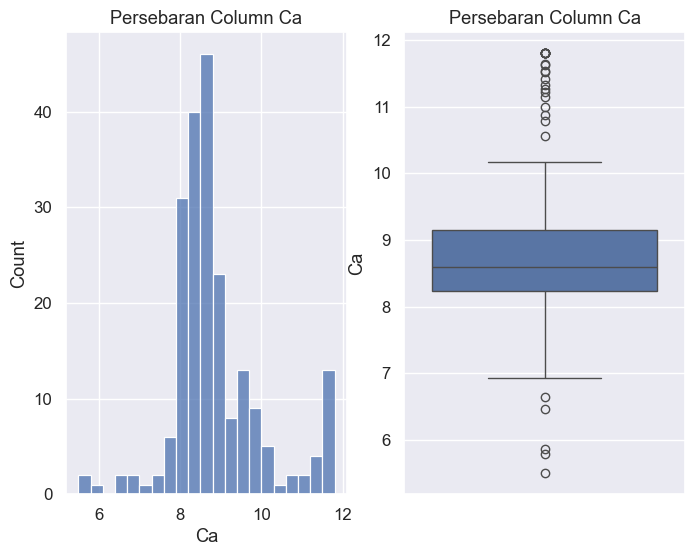

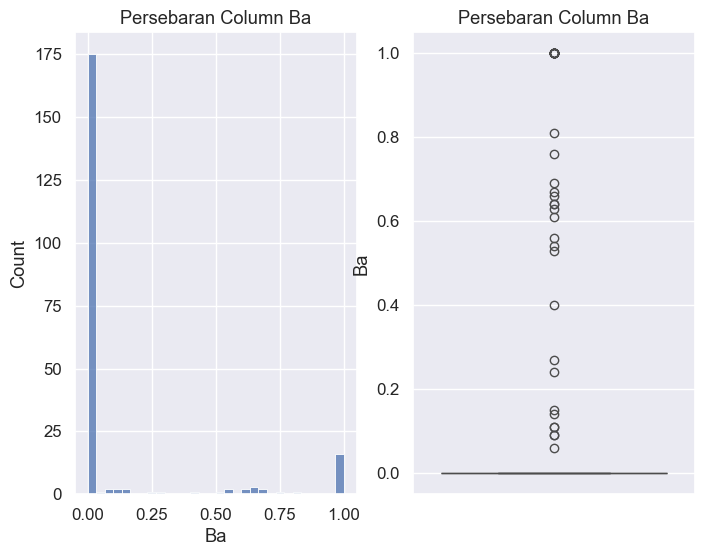

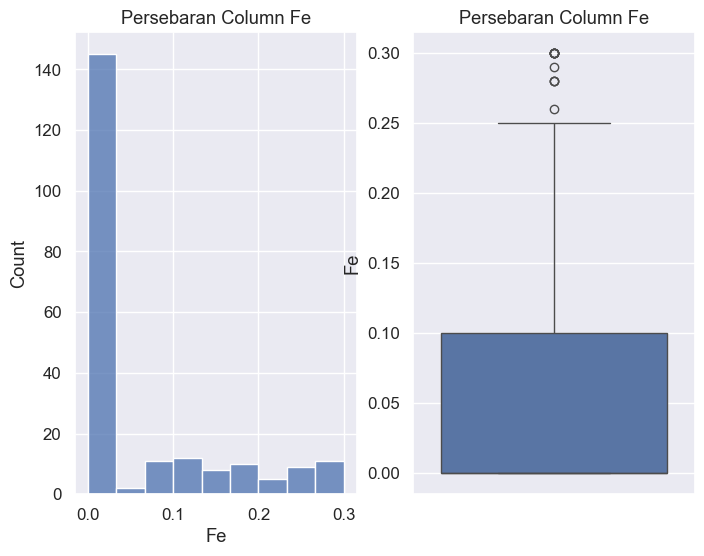

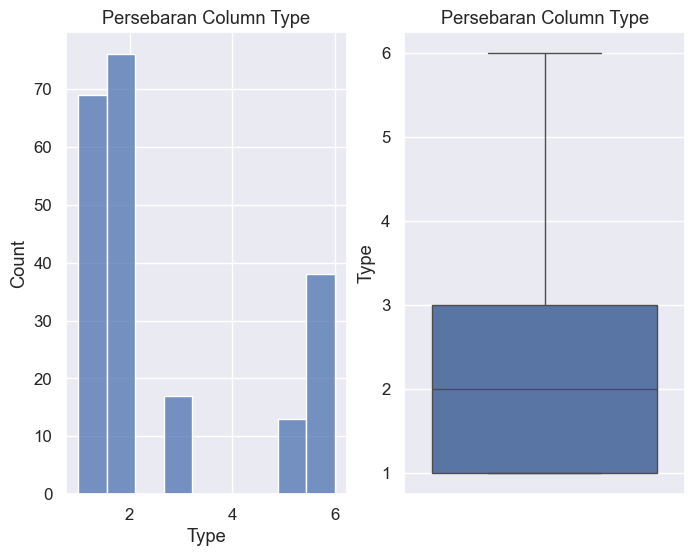

In [77]:
for col in df_clean.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(8,6))
    sns.histplot(df_clean[col], ax=axes[0])
    axes[0].set_title(f"Persebaran Column {col}")
    sns.boxplot(df_clean[col], ax=axes[1])
    axes[1].set_title(f"Persebaran Column {col}")
    
plt.show()

## C. Exploratory Data Analysis (EDA)

### C.1 Cek persebaran data numerik

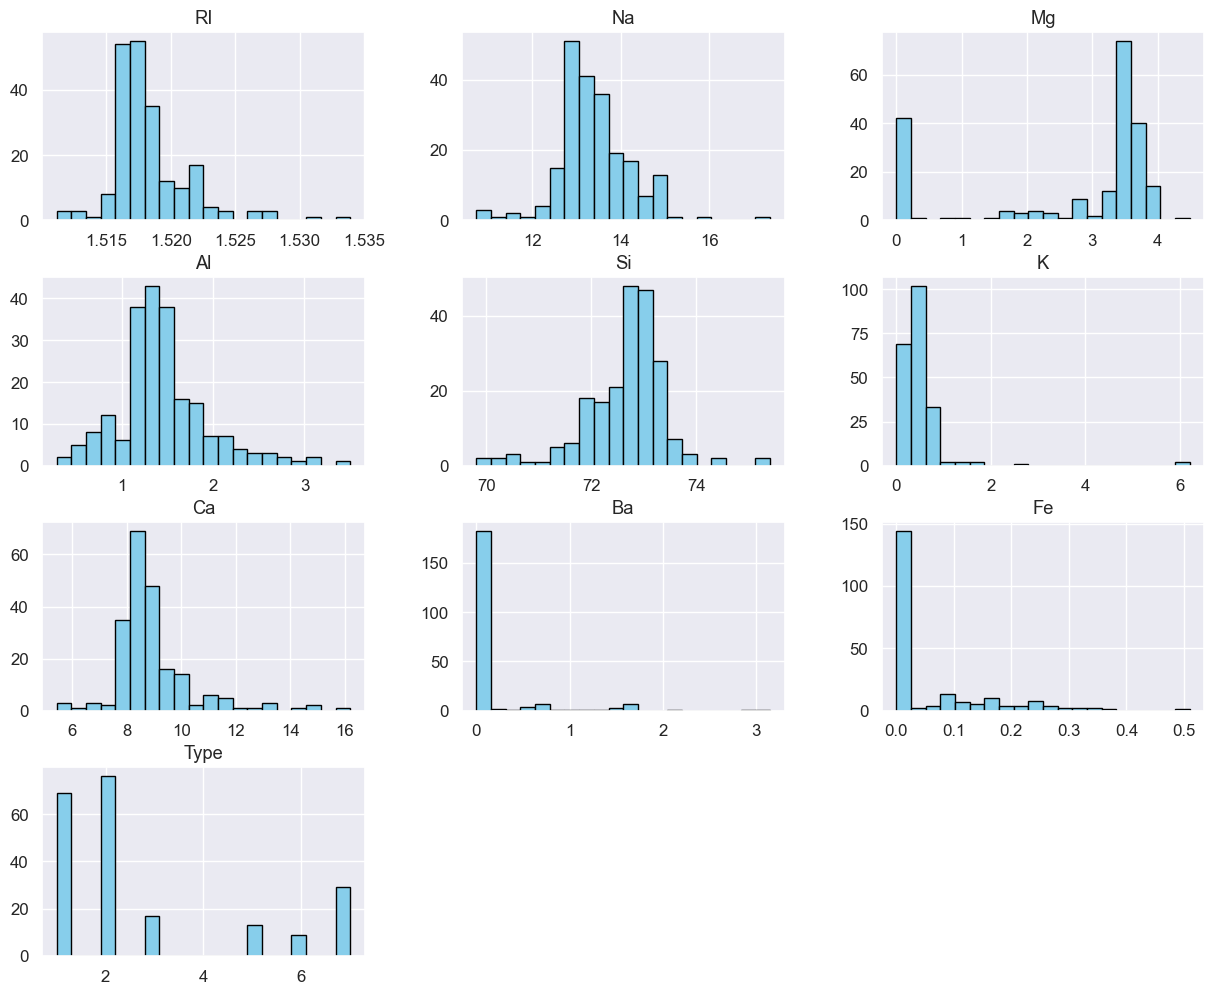

In [78]:
num_clean.hist(bins=20, edgecolor='black', color='skyblue', figsize=(15, 12))
plt.show()

In [79]:
df_clean.skew()

RI      0.731750
Na     -0.020554
Mg     -1.146096
Al      0.823324
Si     -1.063782
K       1.292354
Ca      0.840306
Ba      2.330097
Fe      1.444164
Type    0.959278
dtype: float64

<Axes: >

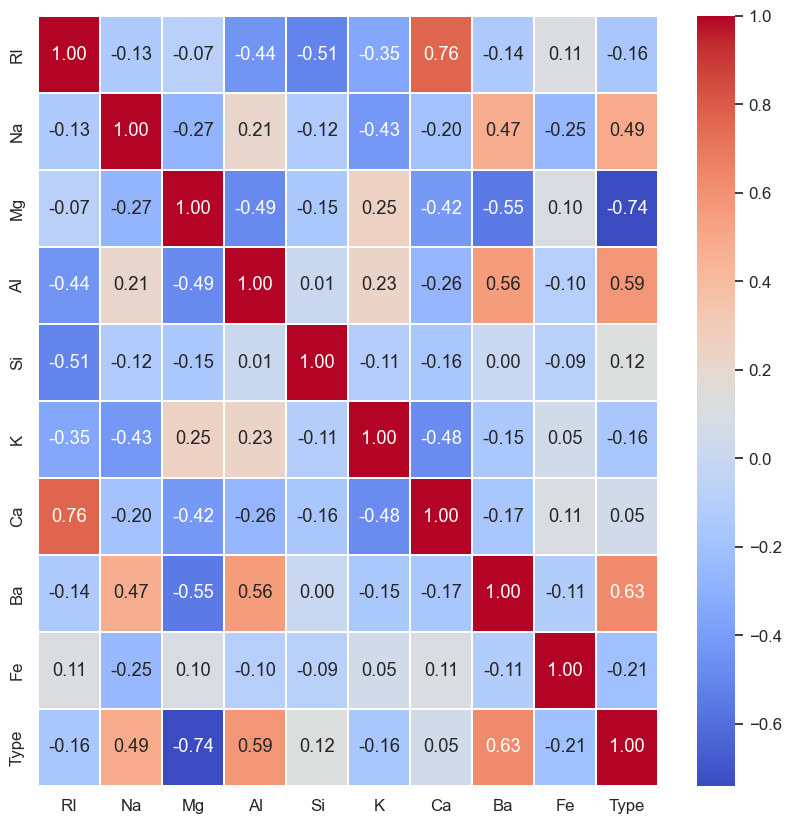

In [80]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_clean.corr(numeric_only=True),
            annot=True, 
            cmap='coolwarm',
            fmt='.2f',
            linewidths=1.1)

In [81]:
print("Deskripsi Ba:")
print(df_clean['Ba'].describe())

Deskripsi Ba:
count    213.000000
mean       0.119249
std        0.294736
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Ba, dtype: float64


Text(0.5, 1.0, 'Persebaran Columns Target')

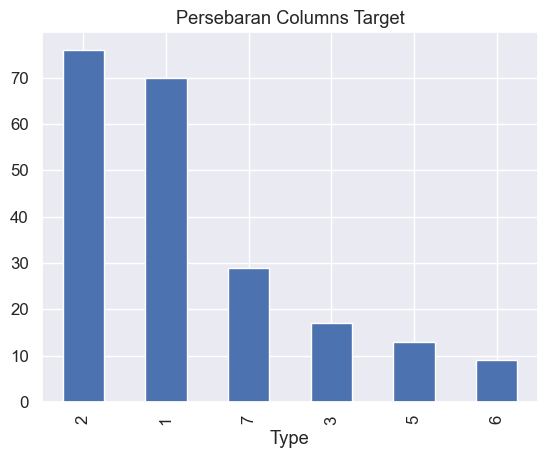

In [82]:
df['Type'].value_counts().plot(kind='bar').set_title("Persebaran Columns Target")

## D. Modeling

### D.1 Split Data

In [83]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [84]:
X = df.drop(columns=['Type'])
y = df['Type']

In [85]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [86]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

### D.2 Normalisasi data (Min-Max Scaling)

KNN menghitung jarak antar titik. Jika satu fitur memiliki rentang angka 0-100 (misal: Si ~72) dan fitur lain hanya 0-1 (misal: RI ~1.5), maka fitur Si akan mendominasi perhitungan jarak. Fitur RI jadi tidak dianggap.

In [87]:
def min_max_scaler(df):
 # rumus  (x-min) / (max-min)
 return (df-df.min()) / (df.max() - df.min())

x_scaled = min_max_scaler(X)

### D.3 Train Test Split Stratified

In [88]:
# buat fungsi stratified
def stratified_split(X, y, train_size = 0.8, random_state=42):
 # buat fungsi random
 np.random.seed(random_state)

  # list kosong untuk x_train, x_test, y_train, y_test
 x_train_list, x_test_list = [],[]
 y_train_list, y_test_list = [],[]

 # looping nilai unik kelas Y
 for class_values in np.unique(y):
 # ambil index[0] kelas Y
  class_idx = np.where(y==class_values)[0]
  # acak index agar tidak urut dan terbagi rata 
  idx = np.random.permutation(class_idx)
  # hitung titik potong
  split_ratio = int(len(idx) * train_size)

  # slice data train
  x_train_list.append(X.iloc[idx[:split_ratio]])
  y_train_list.append(y.iloc[idx[:split_ratio]])

  # slice data test
  x_test_list.append(X.iloc[idx[split_ratio:]])
  y_test_list.append(y.iloc[idx[split_ratio:]])

 # Gabungkan kembali (concatenate)
 x_train = pd.concat(x_train_list).reset_index(drop=True)
 x_test = pd.concat(x_test_list).reset_index(drop=True)
 y_train = pd.concat(y_train_list).reset_index(drop=True)
 y_test = pd.concat(y_test_list).reset_index(drop=True)

 return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = stratified_split(x_scaled, y)

mencoba normalisasi setelah split

melakukan split dahulu tujuanya untuk mencegah kebocoran data, benar akurasi tinggi tapi sama halnya dengan mencontek karena data copy pada data train nanti masuk ke testing set dan ketika evaluasi nanti akan mencontek data yang telah masuk ke testing tadi.

In [89]:
df_train = pd.concat([x_train, y_train], axis=1)

# cari jumlah terbanyak
max_size = df['Type'].value_counts().max()

# buat list kosong
list_data = []

# loopig setiap kelas
for class_index in df_train['Type'].unique():
 # ambil data spesifik per kelas
 df_class = df_train[df_train['Type'] == class_index]

 # lakukan random oversampling
 # Jika jumlah data kelas ini < max_size, dia akan menduplikasi sampai sama.
 # Jika jumlah data kelas ini == max_size, dia cuma mengacak (atau bisa diskip).
 df_class_oversampled = df_class.sample(max_size, replace=True, random_state=42)

 # gabungkan dengan list data
 list_data.append(df_class_oversampled)

 # gabungkan kembali
 df_class_oversampled = pd.concat(list_data)

'''Jika self.y_train masih berupa Pandas Series, perintah [i] seringkali dianggap memanggil Label Index, bukan Posisi Urutan. 
Karena indeksnya duplikat, 
ini bisa menyebabkan error atau pengambilan data yang salah.
Solusi: Anda WAJIB mengonversi hasil oversampling menjadi Numpy Array (.values) sebelum dimasukkan ke fungsi train().'''


# konversi ke numpy
x_train_balanced = df_class_oversampled.drop("Type", axis=1).values
y_train_balanced = df_class_oversampled["Type"].values

x_test_np = x_test.values
y_test_np = y_test.values

In [90]:
# buat class KNN
class KNN:
 def __init__(self, k=3): # buat fungsi init untuk K = 3, 5, 7, 9..dst
   self.k = k
   
 # buat fungsi train
 def train(self, X, y):
   self.x_train = X
   self.y_train = y

 # buat fungsi predict (khusu data X)
 def predict(self, X):
   y_pred = [self._predict(x) for x in X]
   return np.array(y_pred) # jadikan array agar cepat memprediksi (karena KNN merupakan model Lazy Learning)

# buat fungsi prediksi + rumus + voting / bobot
 def _predict(self, x):
   # 1. hitung jarak di semua data training
   jarak_titik = [self.jarak(x,x_train) for x_train in self.x_train]
   # 2. urutkan berdasarkan jarak terdekat, ambil sejumlah k
   k_terbaik = np.argsort(jarak_titik)[:self.k]
   # 3. ambil k terbaik
   label_k_terbaik = [self.y_train[i] for i in k_terbaik]
   # 4. Voting paling banyak
   hasil_voting = max(set(label_k_terbaik), key=label_k_terbaik.count)
   return hasil_voting

# fungsi rumus jarak eculidean
 def jarak(self,x1, x2):
   return np.sqrt(np.sum((x1 - x2) ** 2))

In [112]:
model = KNN(k=3)
model.train(x_train.values, y_train.values)
hasil = model.predict(x_test.values)
print(hasil)

[1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 2 2 2 1 2 2 2 3 2 2 2 2 1 2 2 1 1 3 1 5 5 2
 2 6 7 7 7 7 7 2]


In [92]:
"""model = KNN(k=5)
model.train(x_train_balanced, y_train_balanced)
hasil = model.predict(x_test_np)
print(hasil)"""

'model = KNN(k=5)\nmodel.train(x_train_balanced, y_train_balanced)\nhasil = model.predict(x_test_np)\nprint(hasil)'

In [114]:
akurasi = np.sum(hasil == y_test) / len(x_test)
print(akurasi)

0.7333333333333333


In [94]:
"""akurasi = np.sum(hasil == y_test_np) / len(x_test_np)
print(akurasi)"""

'akurasi = np.sum(hasil == y_test_np) / len(x_test_np)\nprint(akurasi)'

In [115]:
hasil_train = model.predict(x_train.values)

In [116]:
akurasi_train = np.sum(hasil_train == y_train) / len(x_train)
print(akurasi)

0.7333333333333333


In [117]:
def confusion_matrix(y_test, y_prediksi):
 TP = 0
 FP = 0
 FN = 0
 TN = 0

 for asli, tebak in zip(y_test, y_prediksi):
  if asli == 1 and tebak == 1: TP += 1
  elif asli == 0 and tebak == 1: FP += 1
  elif asli == 1 and tebak == 0: FN += 1
  elif asli == 0 and tebak == 0: TN += 1

 return np.array([[TN, FP], [FN, TP]])

In [118]:
cm = confusion_matrix(y_test, hasil)
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]

precision = TP / (TP + FP)
print(precision)

1.0


In [107]:
import numpy as np

 #hitung Precision untuk Kelas 1
target_class = 1

# 1. Hitung TP (True Positive)
# Ambil diagonal index [1][1]
TP = cm[target_class][target_class]

# 2. Hitung FP (False Positive)
# Ambil SEMUA baris di kolom 1, lalu jumlahkan
total_prediksi_kelas_1 = np.sum(cm[:, target_class]) 
FP = total_prediksi_kelas_1 - TP

# 3. Hitung Precision Manual
# Tambahkan epsilon (1e-7) biar tidak error division by zero kalau penyebutnya 0
precision_manual = TP / (TP + FP + 1e-7)

print(f"TP Kelas {target_class}: {TP}")
print(f"FP Kelas {target_class}: {FP} (Total error dari kelas 0,2,3,4,5)")
print(f"Precision Manual Kelas {target_class}: {precision_manual}")

TP Kelas 1: 12
FP Kelas 1: 0 (Total error dari kelas 0,2,3,4,5)
Precision Manual Kelas 1: 0.9999999916666668


In [109]:
cm = confusion_matrix(y_test, hasil)
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]

recall = TP / (TP + FN)
print(recall)

1.0


$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

In [101]:
fscore = 2*(precision * recall) / (precision + recall)
print(fscore)

1.0


In [102]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [103]:
# 1. Definisikan LABEL TARGET yang kamu mau (Wajib Urut & Lengkap)
target_labels = [1, 2, 3, 5, 6, 7]

# 2. Buat Peta Index (Mapping Label -> Index Matriks)
# Hasilnya: {1:0, 2:1, 3:2, 5:3, 6:4, 7:5}
label_to_index = {label: i for i, label in enumerate(target_labels)}

# 3. Siapkan Wadah Kosong (Matriks 6x6)
n_classes = len(target_labels)
cm_manual = np.zeros((n_classes, n_classes), dtype=int)

# 4. LOOPING MANUAL (Pengganti sklearn confusion_matrix)
# Kita sandingkan data Asli (y_test) dan Prediksi (hasil)
for true_label, pred_label in zip(y_test, hasil):
    
    # Pastikan labelnya ada di daftar target kita (jaga-jaga error)
    if true_label in label_to_index and pred_label in label_to_index:
        
        # Cari alamat index-nya
        row = label_to_index[true_label]   # Baris = Aktual
        col = label_to_index[pred_label]   # Kolom = Prediksi
        
        # Tambahkan 1 ke sel tersebut
        cm_manual[row][col] += 1

# --- CEK HASIL MATRIKS ---
print("Confusion Matrix Manual (6x6):")
print(cm_manual)

Confusion Matrix Manual (6x6):
[[12  2  0  0  0  0]
 [ 2 13  0  1  0  0]
 [ 4  0  0  0  0  0]
 [ 0  1  0  1  0  1]
 [ 0  1  0  0  1  0]
 [ 0  1  0  0  0  5]]


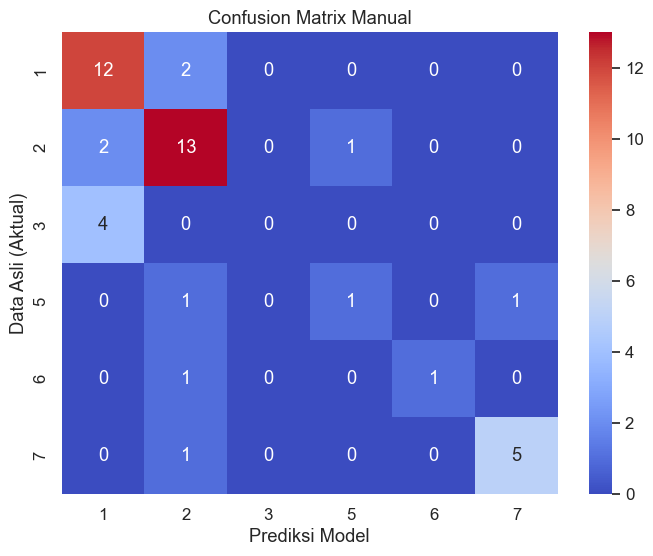

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_manual, 
            annot=True, 
            fmt='d', 
            cmap='coolwarm',
            xticklabels=target_labels, 
            yticklabels=target_labels)

plt.xlabel('Prediksi Model')
plt.ylabel('Data Asli (Aktual)')
plt.title('Confusion Matrix Manual')
plt.show()